<a href="https://colab.research.google.com/github/shourav47/Data-Analysis/blob/main/Missing__Value_Handle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective:
Taking care of Missing Values with below method:
1.  With drop the missing values, Median,Mode, Average, constant interpolation,forward imputation,backward imputation & scikit learn.<br>
2.  Data Filtering with loc & iloc.
3.  String to DateTime Conversion.


The possible ways to do this are:

*  Filling the missing data with the mean or median value if it’s a numerical variable.
*  Filling the missing data with mode if it’s a categorical value.
*  Filling the numerical value with 0 or -999, or some other number that will not occur in the data.<br> This can be done so that the machine can recognize that the data is not real or is different.
*  Filling the categorical value with a new type for the missing values.

# All the Necessary Document & Refereces


1.  https://stackoverflow.com/questions/31645466/give-column-name-when-read-csv-file-pandas<br>
2.  https://towardsdatascience.com/handling-missing-data-f998715fb73f<br>

#Importing the Library

In [647]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper')
sns.set_style('darkgrid')

#Remove all warning

In [648]:
import warnings
warnings.filterwarnings('ignore')

#Mouting the Drive

In [649]:
from google.colab import drive
drive._mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Read the DataFrame & give the name of the column header

> Indented block



In [650]:
col_name = ['DateTime','Verbal_Score','Quant_Score','Total_Score']
with_no_header_df = pd.read_excel ('/content/drive/MyDrive/dataset/GRE.xlsx')
display(with_no_header_df.head(2))
df = pd.read_excel ('/content/drive/MyDrive/dataset/GRE.xlsx', names = col_name, header= None)
display(df.head(5))
  


,2021-12-15 00:00:00,0,1,1.1
0,2021-12-16,1.0,2.0,3
1,2021-12-17,2.0,3.0,5


,DateTime,Verbal_Score,Quant_Score,Total_Score
0,2021-12-15,0.0,1.0,1
1,2021-12-16,1.0,2.0,3
2,2021-12-17,2.0,3.0,5
3,2021-12-18,3.0,NaN,3
4,2021-12-19,NaN,5.0,5


#Cheacking the Parameter for the DataFrame

In [651]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DateTime      15 non-null     datetime64[ns]
 1   Verbal_Score  11 non-null     float64       
 2   Quant_Score   11 non-null     float64       
 3   Total_Score   15 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 608.0 bytes


In [652]:
#Checking all Statistical Parameter
df.describe()

,Verbal_Score,Quant_Score,Total_Score
count,11.000000,11.000000,15.000000
mean,6.545455,7.727273,10.466667
std,4.782544,4.921197,8.733079
min,0.000000,1.000000,0.000000
25%,2.500000,4.000000,4.000000
50%,6.000000,7.000000,8.000000
75%,10.500000,12.000000,13.500000
max,14.000000,15.000000,29.000000


In [653]:
#Checking for Null values
display(df.isnull().sum())

DateTime        0
Verbal_Score    4
Quant_Score     4
Total_Score     0
dtype: int64

In [654]:
display(df)

,DateTime,Verbal_Score,Quant_Score,Total_Score
0,2021-12-15,0.0,1.0,1
1,2021-12-16,1.0,2.0,3
2,2021-12-17,2.0,3.0,5
3,2021-12-18,3.0,NaN,3
4,2021-12-19,NaN,5.0,5
5,2021-12-20,5.0,6.0,11
6,2021-12-21,6.0,7.0,13
7,2021-12-22,NaN,8.0,8
8,2021-12-23,8.0,NaN,8
9,2021-12-24,NaN,NaN,0


# Here we dont need any Total_score column. It is Completely useless. Because if we fill the Verbal & Quant Score then it total score have to change. So we can drop the Column.

In [655]:
#drop the Total_score column
df = df.drop('Total_Score', axis =1)
display(df)

,DateTime,Verbal_Score,Quant_Score
0,2021-12-15,0.0,1.0
1,2021-12-16,1.0,2.0
2,2021-12-17,2.0,3.0
3,2021-12-18,3.0,NaN
4,2021-12-19,NaN,5.0
5,2021-12-20,5.0,6.0
6,2021-12-21,6.0,7.0
7,2021-12-22,NaN,8.0
8,2021-12-23,8.0,NaN
9,2021-12-24,NaN,NaN


###Convert date Object into DateTime

In [656]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Visualising the data with missing values

###Create Missing Values with drop rows

In [657]:
df_drop_null = df.dropna()
df_drop_null = df_drop_null.reset_index()
display(df_drop_null)
#This method is not very convenient if there present very small amount of data

,index,DateTime,Verbal_Score,Quant_Score
0,0,2021-12-15,0.0,1.0
1,1,2021-12-16,1.0,2.0
2,2,2021-12-17,2.0,3.0
3,5,2021-12-20,5.0,6.0
4,6,2021-12-21,6.0,7.0
5,10,2021-12-25,10.0,11.0
6,12,2021-12-27,12.0,13.0
7,14,2021-12-29,14.0,15.0


#Missiing value remove with median

In [658]:
#seeing the median value
display(df.median())

Verbal_Score    6.0
Quant_Score     7.0
dtype: float64

In [659]:
df_median =df.copy()
df_median = df_median.fillna(df_median.median())
#display(df_median)

#Missing value remove with mean

In [660]:
#Seeing the mean value
display(df.mean())

Verbal_Score    6.545455
Quant_Score     7.727273
dtype: float64

In [661]:
df_mean = df.copy()
df_mean = df_mean.fillna(df_mean.mean())
#display(df_mean)

#Missing value replaced with Constant Value

In [662]:
df_Constant = df.copy()
df_Constant = df_Constant.fillna(7)
display(df_Constant)

,DateTime,Verbal_Score,Quant_Score
0,2021-12-15,0.0,1.0
1,2021-12-16,1.0,2.0
2,2021-12-17,2.0,3.0
3,2021-12-18,3.0,7.0
4,2021-12-19,7.0,5.0
5,2021-12-20,5.0,6.0
6,2021-12-21,6.0,7.0
7,2021-12-22,7.0,8.0
8,2021-12-23,8.0,7.0
9,2021-12-24,7.0,7.0


#Missing values replaced with interpolation

######How interpolation method works?

----First it sees the start & end point between the missing values. Then it insert values with equal distance untill all the missing values got replaced with values.<br>

---- 'krogh', 'piecewise_polynomial', 'spline', 'pchip' and 'akima'
methods are used.

In [663]:
df_interpolation = df.copy()
df_interpolation = df_interpolation.fillna(df_interpolation.interpolate(method =  'linear'))
display(df_interpolation)

,DateTime,Verbal_Score,Quant_Score
0,2021-12-15,0.0,1.0
1,2021-12-16,1.0,2.0
2,2021-12-17,2.0,3.0
3,2021-12-18,3.0,4.0
4,2021-12-19,4.0,5.0
5,2021-12-20,5.0,6.0
6,2021-12-21,6.0,7.0
7,2021-12-22,7.0,8.0
8,2021-12-23,8.0,9.0
9,2021-12-24,9.0,10.0


#Missing value replaced with forward imputation

---- It finds the first missing value then imputes the missing value using the cell value that is immediately prior.

In [664]:
df_forward = df.copy()
df_forward = df_forward.fillna(method = 'ffill')
display(df_forward)

,DateTime,Verbal_Score,Quant_Score
0,2021-12-15,0.0,1.0
1,2021-12-16,1.0,2.0
2,2021-12-17,2.0,3.0
3,2021-12-18,3.0,3.0
4,2021-12-19,3.0,5.0
5,2021-12-20,5.0,6.0
6,2021-12-21,6.0,7.0
7,2021-12-22,6.0,8.0
8,2021-12-23,8.0,8.0
9,2021-12-24,8.0,8.0


#Missing value replaced with Backward imputation

---- It finds the last missing value then imputes the missing value using the <br> cell value that is immediately prior untill the start value before the missing value.

In [665]:
df_backward = df.copy()
df_backward = df_backward.fillna(method = 'bfill')
display(df_backward)

,DateTime,Verbal_Score,Quant_Score
0,2021-12-15,0.0,1.0
1,2021-12-16,1.0,2.0
2,2021-12-17,2.0,3.0
3,2021-12-18,3.0,5.0
4,2021-12-19,5.0,5.0
5,2021-12-20,5.0,6.0
6,2021-12-21,6.0,7.0
7,2021-12-22,8.0,8.0
8,2021-12-23,8.0,11.0
9,2021-12-24,10.0,11.0


#Missing value replace replaced with machine learning model KNN imputer

###Question on mind: When we will use KNN imputer?

ANS: Suppose we have missing values in Blood Pressure column. For a particular patient, there missing blood pressure.<br> Now if the person age is less then if we use mean,median & other statistical method to fill the missing value then it will<br> drive us in wrong direction. Rather based on relative column such as Age,Sugar level,Smoking etc if we predict the blood <br> pressure then it will give us a right result. So in this scenario, we use knn imputer.

Note: One thing to note here is that the KNN Imputer does not recognize text data values. It will generate errors if we do <br> not change these values to numerical values with dummy variables.

Ref:
1. https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/

In [666]:
df_knn = df.copy()

In [667]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors= 2)

df_filled = pd.DataFrame(data=imputer.fit_transform(df_knn[['Verbal_Score','Quant_Score']]),
                         columns=['Verbals_Score','Quants_Score'])
df_filled = df_filled.round(2)

In [668]:
df_imputer = pd.concat([df_knn,df_filled], axis =1)
display(df_imputer.head(3))
cols = [1,2]
df_imputer.drop(df_imputer.columns[cols], axis =1, inplace =True)
df_imputer = df_imputer.rename( columns= {'Verbals_Score':'Verbal_Score', 'Quants_Score': 'Quant_Score'})
display(df_imputer)

,DateTime,Verbal_Score,Quant_Score,Verbals_Score,Quants_Score
0,2021-12-15,0.0,1.0,0.0,1.0
1,2021-12-16,1.0,2.0,1.0,2.0
2,2021-12-17,2.0,3.0,2.0,3.0


,DateTime,Verbal_Score,Quant_Score
0,2021-12-15,0.00,1.00
1,2021-12-16,1.00,2.00
2,2021-12-17,2.00,3.00
3,2021-12-18,3.00,2.50
4,2021-12-19,3.50,5.00
5,2021-12-20,5.00,6.00
6,2021-12-21,6.00,7.00
7,2021-12-22,5.50,8.00
8,2021-12-23,8.00,9.00
9,2021-12-24,6.55,7.73


#Missing value replaced using SimpleImputer

In [669]:
df_scikit = df.copy()

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer =imputer.fit(df_scikit.iloc[:, 1:3].values)
df_scikit = imputer.fit_transform(df_scikit.iloc[:, 1:3].values)
df_scikit = pd.DataFrame(data = df_scikit, columns =['Verbal_Score','Quant_Score'])
df_scikit =df_scikit.round(2)
display(df_scikit)

,Verbal_Score,Quant_Score
0,0.00,1.00
1,1.00,2.00
2,2.00,3.00
3,3.00,7.73
4,6.55,5.00
5,5.00,6.00
6,6.00,7.00
7,6.55,8.00
8,8.00,7.73
9,6.55,7.73


#plotting all the graph for missing value

In [670]:
def plot_missing(data,title):
  plt.plot(data['DateTime'], data['Verbal_Score'], label = 'Verbal_Score', marker = 'o')
  plt.plot(data['DateTime'],data['Quant_Score'], label = 'Quant_Score', marker = 'o')
  plt.xticks(rotation = 60)
  plt.legend()
  plt.xlabel('Date Of Attented Exam')
  plt.ylabel('Gre & Verbal Score')
  plt.title(label = title, pad =20, fontsize = 15)

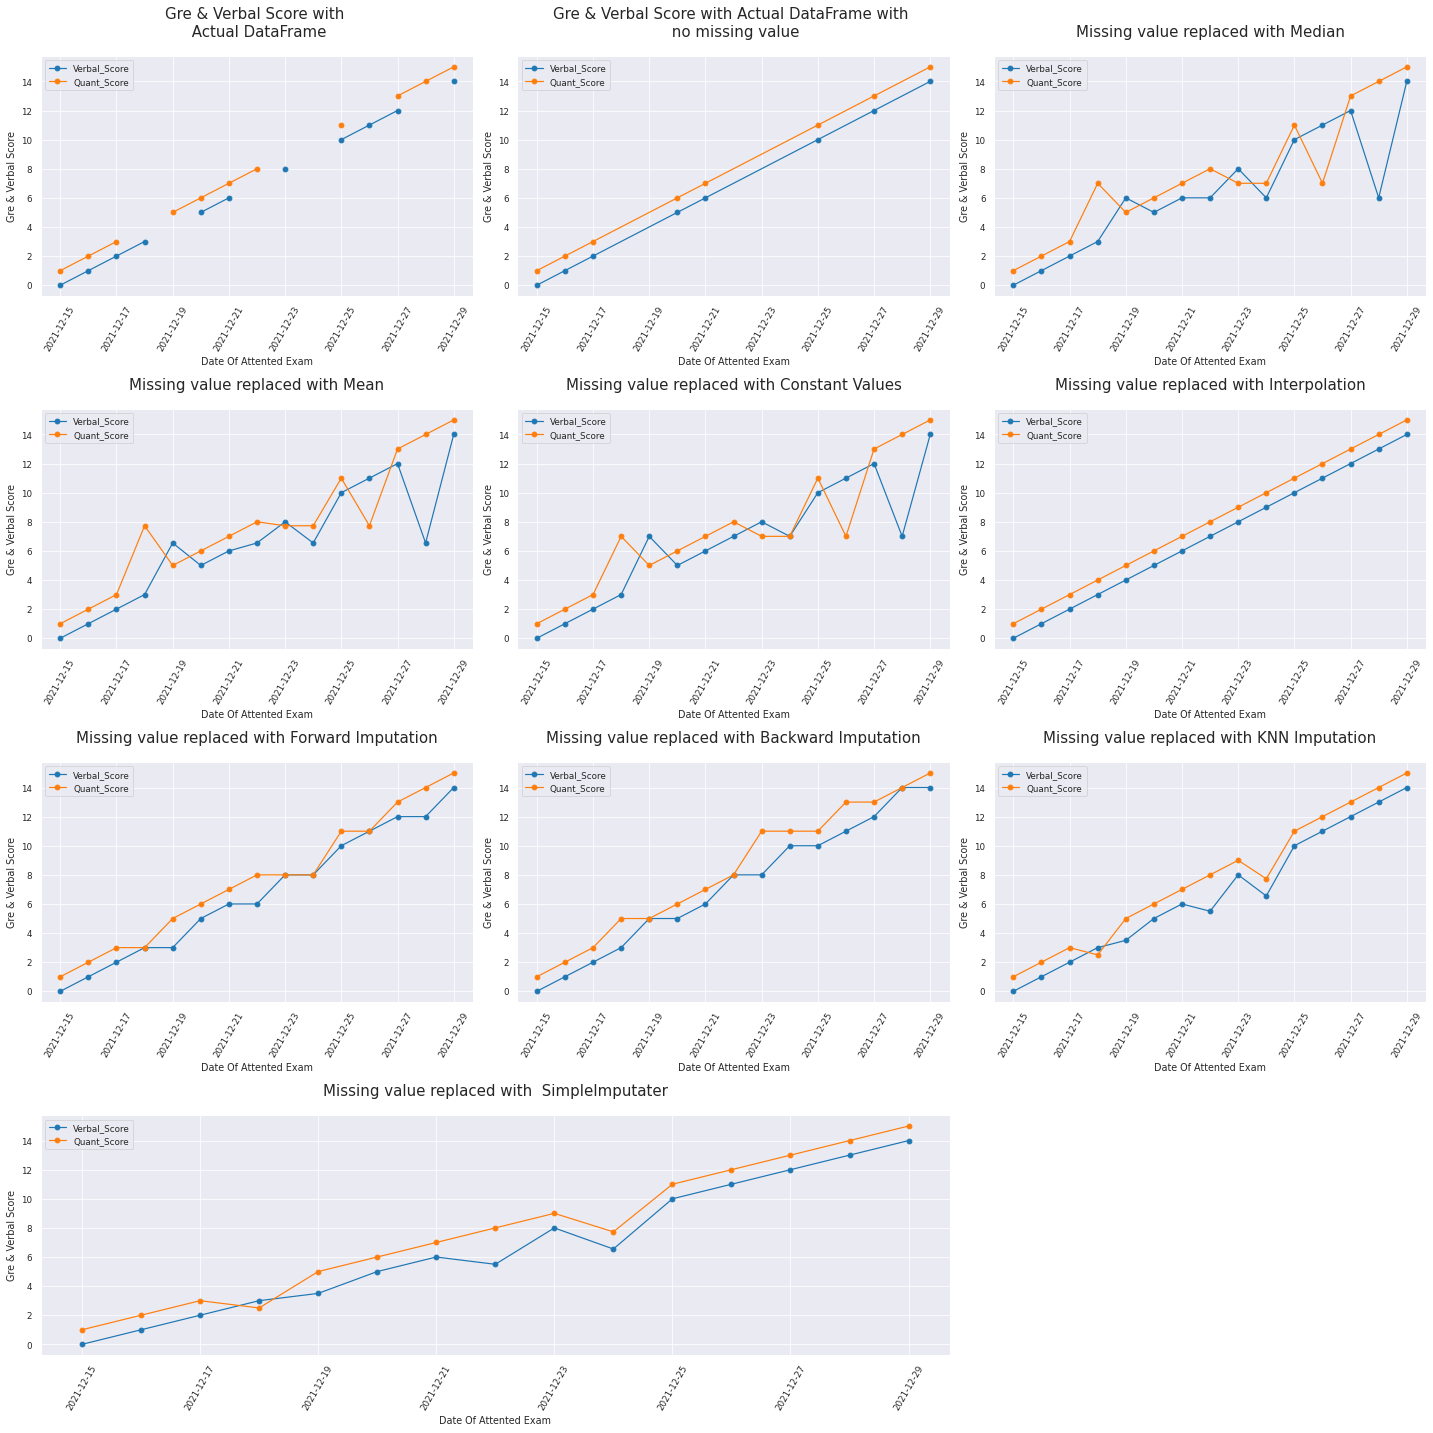

In [672]:
plt.figure(figsize=(20,20))
plt.tight_layout()

plt.subplot(4,3,1)
plot_1 = plot_missing(df,'Gre & Verbal Score with \n Actual DataFrame')

plt.subplot(4,3,2)
plot_2 = plot_missing(df_drop_null,'Gre & Verbal Score with Actual DataFrame with \n no missing value')

plt.subplot(4,3,3)
plot_3 = plot_missing(df_median, 'Missing value replaced with Median')
plt.tight_layout()

plt.subplot(4,3,4)
plot_4 = plot_missing(df_mean, 'Missing value replaced with Mean')
plt.tight_layout()

plt.subplot(4,3,5)
plot_5 = plot_missing(df_Constant, 'Missing value replaced with Constant Values')
plt.tight_layout()


plt.subplot(4,3,6)
plot_6 = plot_missing(df_interpolation,'Missing value replaced with Interpolation')
plt.tight_layout()

plt.subplot(4,3,7)
plot_7 = plot_missing(df_forward,'Missing value replaced with Forward Imputation')
plt.tight_layout()

plt.subplot(4,3,8)
plot_8 = plot_missing(df_backward,'Missing value replaced with Backward Imputation')
plt.tight_layout()

plt.subplot(4,3,9)
plot_9 = plot_missing(df_imputer,'Missing value replaced with KNN Imputation')
plt.tight_layout()

plt.subplot(4,3,(10,11))
plot_9 = plot_missing(df_imputer,'Missing value replaced with  SimpleImputater')
plt.tight_layout()

#Decision:

Above the graph the interpolation method is perfect. So we will use interpolation method to find out the missing values.

####Note:
There is no perfect way for filling the missing values in a dataset.<br>

Each of the methods that I have learnt  in this colab, may work well with different types of datasets. We have to experiment through different methods, to check which method works the best for your dataset by finding the accuracy.